In [402]:
#This python script was intiated in order to explore some basic ProofPoint order information. 
#This covers all proofpoint orders since initiation, but can be applied to any vendor or order dates.

In [403]:
#Import the necessary packages for this exploration

In [404]:
import pandas as pd
import numpy as n
import seaborn as sns
from matplotlib import pyplot





pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)

In [405]:
#Lets start by importing our csv. It is super easy and Carahsell gives us a great format for these orders with lots of info.

orders = pd.read_csv("ProofPoint.csv", encoding= 'unicode_escape') #I had to use unicode escape due to an error.


In [406]:
#Lets look at our data and make sure it reads in the way we want it to.

orders.head(50)

,Order ID,Quote ID,Cust No,Customer Name,Main Agency,Sales Rep,Total Order,Total Cost,Open Amount,Margin,Reseller,Reseller Rep1,Reseller Rep2,Region1,Region2,Region3,Region4,Region5,Vendor,Vendor Name,Vendor Rep1,Vendor Rep2,Deal Reg Number,quotes Vendor Quote No,Date Booked,Opp ID,Team,Main Product,Vendor Buy,Customer PO,Reference PO,Date PO Sent,Status,GSA Contract,Contract Type,Product Type,Ship To State,SO#,Lead Source,List Name,Shipto Name,Enduser First Name,Enduser Last Name,Enduser Agency,Email,Quotes Maintenance Start Date,SEWP TN,Quotes Maintenance End Date,SEWP RFQ,Event ID
0,1884604,NaN,NaN,SHI,SNHU,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,Core Cyber,NaN,Proofpoint Inc,SRV-S48857968,NaN,NaN,ON HOLD - PoP,NaN,Open Market,Issue?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1942257,NaN,NaN,GovConnection,Univ of Richmond,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,Core Cyber,NaN,Proofpoint Inc,21122122,NaN,NaN,ON HOLD - PoP,NaN,Open Market,Arrears Billing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1969165,NaN,NaN,Solid Border,Lamar CSD,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,Core Cyber,PA-3020,Proofpoint Inc,863617,NaN,NaN,ON HOLD - PoP,NaN,Open Market,Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1987780,NaN,NaN,BlueAlly,Seminole Tribe,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,Core Cyber,NaN,Proofpoint Inc,B311605,NaN,NaN,ON HOLD - PoP,NaN,Open Market,Issue?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1987885,NaN,NaN,BlueAlly Tech,Seminole Tribe,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,Core Cyber,NaN,Proofpoint Inc,B311607,NaN,NaN,ON HOLD - PoP,NaN,NASPO AR2472,Issue?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20001295,NaN,NaN,BAI,Wilson College,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,Core Cyber,NaN,Proofpoint Inc,10684-PP,NaN,NaN,ON HOLD - PoP,NaN,Open Market,Issue?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20013905,NaN,NaN,Presidio,Boulder Valley Public Schools,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,NaN,NaN,Core Cyber,NaN,Proofpoint Inc,41142000067-01,NaN,NaN,ON HOLD - PoP,NaN,Open Market,Issue?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1867817,12726118.0,OSE002,Optiv,Oklahoma City Community College,NaN,33053.13,31731.00,0.00,1322.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,RQ-000010989,10/08/18,NaN,Core Cyber,NaN,Proofpoint Inc,PO-44000079961972749,B0049601,10/09/18,PAID/CLOSED,NaN,GS-35F-0119Y,Product,OK,NaN,NaN,NaN,NaN,Kevin,Wallace,Oklahoma City Community College,kwallace@occc.edu,11/21/18,NaN,11/20/19,NaN,NaN
8,1872474,NaN,NaN,SHI International Corp.,TEXAS A&M BUSINESS COMPUTING SERVICES,NaN,0.00,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,10/29/18,NaN,Core Cyber,NaN,Proofpoint Inc,GP00619838,AB0399087/,NaN,CANCELLED,NaN,Open Market,Issue?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1775401,NaN,NaN,CSPI,Broward College,NaN,45717.47,44350.00,NaN,1367.47,NaN,NaN,NaN,SLED,NaN,NaN,NaN,NaN,"Proofpoint, Inc.","Proofpoint, Inc.",NaN,NaN,NaN,NaN,11/15/18,NaN,Core Cyber,NaN,Proofpoint Inc,CSPI-MSP-BROWARD,NaN,NaN,INVOICED,NaN,GS-35F-0119Y,Product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
#Gives us some basic info on the types of variables contained in the spreadsheet.

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order ID                       874 non-null    int64  
 1   Quote ID                       851 non-null    float64
 2   Cust No                        826 non-null    object 
 3   Customer Name                  874 non-null    object 
 4   Main Agency                    874 non-null    object 
 5   Sales Rep                      854 non-null    object 
 6   Total Order                    874 non-null    float64
 7   Total Cost                     872 non-null    float64
 8   Open Amount                    826 non-null    float64
 9   Margin                         872 non-null    float64
 10  Reseller                       789 non-null    object 
 11  Reseller Rep1                  746 non-null    object 
 12  Reseller Rep2                  108 non-null    obj

<AxesSubplot:xlabel='Status', ylabel='count'>

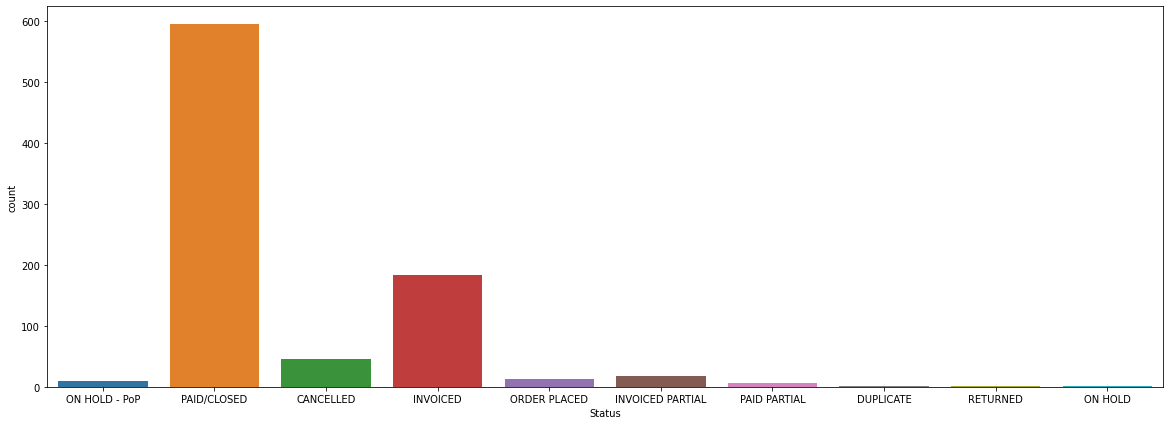

In [408]:
#We can now start our exploratory analysis. Lets look at a couple of pie charts that give us a good look at our data.

pyplot.subplots(figsize=(20,7))

sns.countplot(x='Status', data=orders)

<AxesSubplot:xlabel='Sales Rep', ylabel='count'>

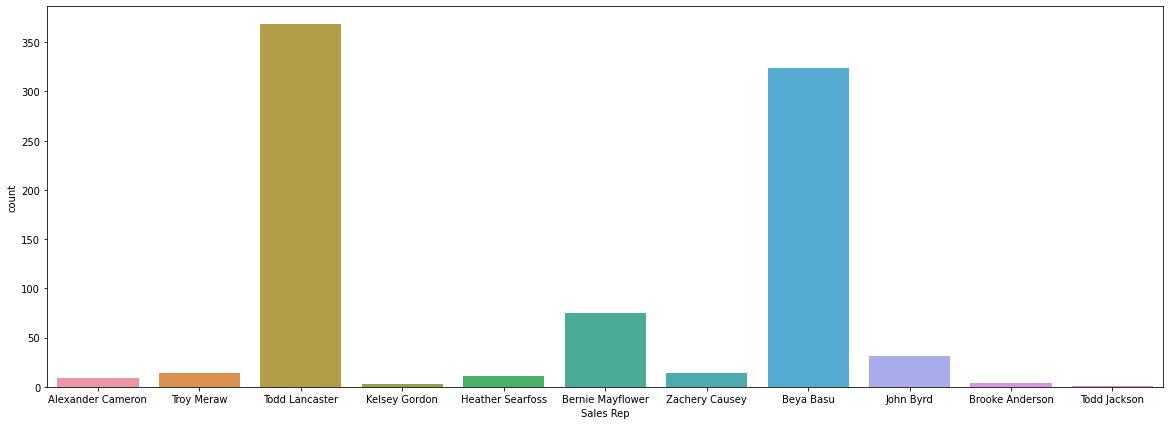

In [409]:
pyplot.subplots(figsize=(20,7))

sns.countplot(x='Sales Rep', data=orders)

Text(0.5, 17.200000000000003, 'Representative')

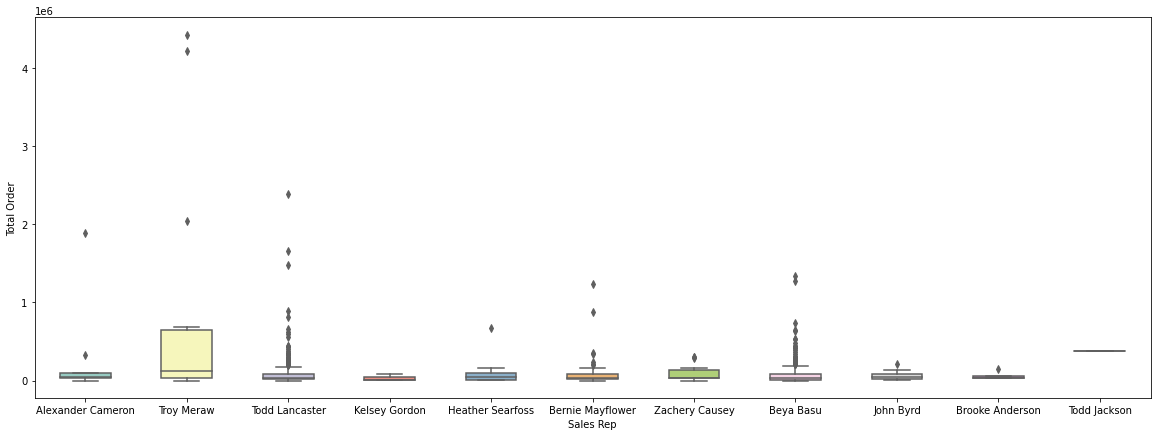

In [410]:
#Lets make a boxplot of total cost. This will give us an idea of the spread of our data for each representative

pyplot.subplots(figsize=(20,7))


sns.boxplot(x="Sales Rep", y="Total Order", data=orders, palette="Set3", width=.5)
ax.set_ylabel('Total Order (In millions)')
ax.set_xlabel('Representative')


In [411]:
#Lets take a closer look at some of our numerical data. We can see counts, means, standard deviation, and spread of the data.

orders.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Order ID,Quote ID,Total Order,Total Cost,Open Amount,Margin,Deal Reg Number,Opp ID,SEWP TN,Event ID
count,874,851,874,872,826,872,0,0,0,1
mean,7.52324e+06,1.63471e+07,97870.7,94937.3,4981.56,3157.85,nan,nan,nan,21117
std,8.3993e+06,3.95483e+06,279238,273047,50958.2,7439.91,nan,nan,nan,nan
min,1.71952e+06,9.28620e+06,0,0,0,0,nan,nan,nan,21117
25%,1.8775e+06,1.30569e+07,11740.6,11398.1,0,431.778,nan,nan,nan,21117
50%,1.9496e+06,1.6447e+07,36134.7,35000,0,1338.03,nan,nan,nan,21117
75%,2.00174e+07,1.80711e+07,86749.1,83403.2,0,3025.59,nan,nan,nan,21117
max,2.0087e+07,2.39499e+07,4.42715e+06,4.37639e+06,1.15601e+06,110937,nan,nan,nan,21117


In [412]:
#Lets delete all of these un-needed columns. This is done to both avoid columns that bear no effect on the data, such as 
#names, emails, and other things. We also want to avoid multicolinearity. 

orders.drop(['Order ID', 'Quote ID', 'Cust No','Deal Reg Number',
                                 'quotes Vendor Quote No','Opp ID','Customer PO',
                                 'GSA Contract','SO#','Shipto Name','Enduser First Name',
                                 'Enduser Last Name','Region2','Region3','Region4','Region5',
                                 'Email','SEWP TN', 'SEWP RFQ', 'Vendor Rep2', 'Region1', 'Quotes Maintenance Start Date',
                                 'Quotes Maintenance End Date', 'Margin', 'Reseller Rep1', 'Total Cost', 'Open Amount',
                                 'Vendor', 'Vendor Name', 'Vendor Rep1', 'Date Booked', 'Team', 'Vendor Buy', 'Date PO Sent',
                                 'Ship To State', 'Enduser Agency',
                                 'Event ID','Reference PO','List Name', 'Reseller Rep2', 'Main Product'], axis=1, inplace=True)


In [413]:
#Drops our null values from the dataset so we have a complete picture.

orders.dropna(inplace = True)

In [414]:
#Much cleaner. And it has only the data we need. Plus no null values

orders.isnull().sum()

Customer Name    0
Main Agency      0
Sales Rep        0
Total Order      0
Reseller         0
Status           0
Contract Type    0
Product Type     0
Lead Source      0
dtype: int64

In [415]:
orders.shape

(764, 9)

In [416]:
#Now we need to drop our status options into two descreet bins. One is a closed deal and the other is a not closed deal.

#Lets take a look at the unique values within the Status parameter

orders['Status'].unique()

array(['PAID/CLOSED', 'CANCELLED', 'INVOICED', 'INVOICED PARTIAL',
       'PAID PARTIAL', 'RETURNED', 'ORDER PLACED', 'ON HOLD - PoP',
       'DUPLICATE', 'ON HOLD'], dtype=object)

In [417]:
orders['Status'].replace(['PAID/CLOSED', 'INVOICED', 'CANCELLED', 
                          'INVOICED PARTIAL', 'DUPLICATE', 'PAID PARTIAL', 'RETURNED', 
                          'ORDER PLACED', 'ON HOLD - PoP', 'ON HOLD'], 
                         [1, 1, 0, 1, 0, 1, 0, 1, 0, 0], inplace = True)


In [418]:
orders['Status'].unique()

array([1, 0], dtype=int64)

In [419]:
#Now we move away from graphs and get into the nitty gritty. Lets start with sales rep exploration analysis. 
#We are going to create dummy variables for our Sales Reps so we can use them as indicators for our analysis.

#Need to drop all the other columns that arn't relevant to the exploration.

sales_rep_dummies = pd.get_dummies(orders['Sales Rep'], drop_first=True)  #This drops one of the dummies to avoid dummy problem.
main_agency_dummies = pd.get_dummies(orders['Main Agency'], drop_first=True)
frames = [orders, sales_rep_dummies, main_agency_dummies]

dummy_orders = pd.concat(frames, axis=1)






In [420]:
#Now we drop all of our original dummy variable columns. We dont need them anymore.

dummy_orders.drop(['Customer Name', 'Main Agency', 'Sales Rep', 'Reseller', 'Product Type', 'Lead Source', 'Contract Type'], axis=1, inplace=True)

In [421]:
#After creating our dummies, we will then want to drop the dummy columns!

In [422]:
dummy_orders

,Total Order,Status,Bernie Mayflower,Beya Basu,Brooke Anderson,Heather Searfoss,John Byrd,Kelsey Gordon,Todd Lancaster,Troy Meraw,Zachery Causey,ACGME,AL DEPT OF TRANSPORTATION,AL DEPT OF TRANSPORTATION COMPUTER SERVI,AMERITECH COLLEGE OF HEALTHCARE,APSU,ART CENTER COLLEGE OF DESIGN,AURORA UNIVERSITY,AUSTIN PEAY,AUSTIN PEAY STATE UNIVERSITY,AZ Dept. of Health Services,Ada County,Ada County Information,Alaska Native Medical Center,Alaska Native Tribal Health,Alaska Native Tribal Health Consortium,"Alcohol, Tobacco, Tax and Trade Bureau",Alcosan,Alexander County,Arizona State University,Arlington ISD,Arlington Independent School District,Art Center College of Design,Atlanta Public Schools,BIA,BISK Education,BROWARD COLLEGE,BUTTE GLENN COMMUNITY COLLEGE,BYU - Provo,Baldwin County Board of Education,Bergen County,Boulder Valley Public Schools,Bowdoin College,Boyd Gaming,Brigham Young University,Brookhaven National Lab,Brookhaven National Laboratory,Broward College,Broward County - ETS,C5I Service Center Martinsburg,...,UC RIVERSIDE SOM EDUCATION,UCSD Medical Center,UMASS Lowell,UNIVERSITY OF OKLAHOMA,UPenn,US Coast Guard,US DEPT OF ENERGY,US DOE c/o MSTS,US Department of Energy,US Department of State,US Dept. Of Commerce,US GOVERNMENT ACCOUNTABILITY OFFICE,US House of Representatives,US Senate,USAF,USAREC,USCYBERCOM,"USCYBERCOM, J6",USDA,UTAH RETIREMENT SYSTEMS,UTAH Retirement Systems,"Univ. of CA, San Diego",Univeristy of PA,University of Arkansas,University of California San Diego,University of Chicago,University of Chicago IT Network Service,University of Denver,University of Mary Hardin Baylor,University of Richmond,University of SC,University of St. Thomas,University of Vermont,University of West Alabama,Utah Retirement Systems,Van Buren County,Virginia Tech,WEILL CORNELL MEDICAL,WEST VALLEY CITY,WILMINGTON UNIVERSITY,Washington County,Washington Metropolitan Area Transit Aut,White Mountain Apache Tribe,William Carey University,Wilson College,Winthrop University,Worchester Gov,Yuma Co Info Tech Svcs,Yuma County Information Technology,Yuma County SHERIFFS OFFICE
20,97617.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,40596.87,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22,1887277.08,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23,326934.22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,27725.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,114578.13,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
869,29586.40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [423]:
#Lets start the algorithm. We need to split our data into two subsets. Train and test, to allow our algorithm
#to learn and then see how accurate it is. Lets begin by declaring our train and test sets.

X = dummy_orders.drop(['Status'], axis=1)
y = dummy_orders['Status']


In [424]:
#We will be using sklearns train_test_split function, which will split the data into two pieces.
#One piece will train our model to make predictions, the second will then work to predict the outcomes on our other records.

from sklearn.model_selection import train_test_split

In [425]:
#This calls into being the necessary componenets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)

In [426]:
from sklearn.linear_model import LogisticRegression

In [427]:
#Instantiates our logmodel

logmodel=LogisticRegression(max_iter=10000)

In [428]:
#Fits the training data onto the model.

logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [429]:
#Runs the fitted model on the Test data to find our y values.

predictions = logmodel.predict(X_test)

In [430]:
from sklearn.metrics import classification_report, confusion_matrix

In [431]:
#The classification report shows us how accurate our model performed. 

report = classification_report(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.97      1.00      0.99       224

    accuracy                           0.97       230
   macro avg       0.49      0.50      0.49       230
weighted avg       0.95      0.97      0.96       230



C:\Users\Jack\Documents\Python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [432]:
#Shows us our confusion matrix, basically the ratios of the correctly predicted values.

matrix = confusion_matrix(y_test,predictions)

print(matrix)

[[  0   6]
 [  0 224]]
